In [1]:
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
datadir = '/storage/groups/ml01/datasets/projects/20200101_Various_SfairaDataRepository_leander.dony/human/pancreas/'

sc.logging.print_version_and_date()
sc.settings.verbosity = 0 

Running Scanpy 1.5.1, on 2020-07-30 14:53.


In [2]:
#import sfaira.api as sfaira

In [3]:
#ds = sfaira.data.human.DatasetGroupPancreas(path=datadir)

In [4]:
#ds.load_all()  # This loads the anndata objects into memory
#print(ds.adata) # Use the adata object for your analysis or modelling.

In [5]:
import os
fn = os.path.join(datadir+"E-MTAB-5061.processed.1.zip")
df = pd.read_csv(fn, sep='\t')
df.index = df.index.get_level_values(0)
df = df.drop('#samples', axis=1)
df = df.T.iloc[:, :26178]
adata_0 = anndata.AnnData(df)
adata_0.obs = pd.read_csv(os.path.join(datadir+"E-MTAB-5061.sdrf.txt"), sep='\t')\
            .set_index('Source Name')\
            .loc[adata_0.obs.index]  # TODO: will break if self.path is not set
        # filter observations which are not cells (empty wells, low quality cells etc.)
adata_0 = adata_0[adata_0.obs['Characteristics[cell type]'] != 'not applicable'].copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
set(adata_0.obs['Characteristics[disease]'])

{'normal', 'type II diabetes mellitus'}

In [7]:
adata_0 = adata_0[adata_0.obs['Characteristics[disease]']=='normal']

In [8]:
adata_0

View of AnnData object with n_obs × n_vars = 1097 × 26178
    obs: 'Comment[ENA_SAMPLE]', 'Comment[BioSD_SAMPLE]', 'Characteristics[organism]', 'Characteristics[organism part]', 'Characteristics[individual]', 'Characteristics[single cell well quality]', 'Characteristics[cell type]', 'Characteristics[disease]', 'Characteristics[sex]', 'Characteristics[age]', 'Unit[time unit]', 'Term Source REF', 'Term Accession Number', 'Characteristics[body mass index]', 'Material Type', 'Protocol REF', 'Protocol REF.1', 'Performer', 'Extract Name', 'Comment[LIBRARY_LAYOUT]', 'Comment[LIBRARY_SELECTION]', 'Comment[LIBRARY_SOURCE]', 'Comment[LIBRARY_STRAND]', 'Comment[LIBRARY_STRATEGY]', 'Protocol REF.2', 'Performer.1', 'Assay Name', 'Technology Type', 'Comment[ENA_EXPERIMENT]', 'Scan Name', 'Comment[SUBMITTED_FILE_NAME]', 'Comment[ENA_RUN]', 'Comment[FASTQ_URI]', 'Protocol REF.3', 'Derived Array Data File', 'Comment [Derived ArrayExpress FTP file]', 'Factor Value[disease]', 'Factor Value[cell type]'

In [9]:
adata_0.X

ArrayView([[ 0.,  3.,  0., ...,  0.,  0.,  0.],
           [ 0.,  0.,  0., ...,  0.,  0.,  0.],
           [ 0.,  0.,  0., ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0., ...,  0.,  0.,  0.],
           [ 0.,  0.,  0., ...,  0.,  0.,  0.],
           [ 0.,  0., 24., ...,  0.,  0.,  0.]], dtype=float32)

In [10]:
adata_1 = sc.read_h5ad(datadir+'baron16.processed.h5ad')
adata_2 = sc.read_h5ad(datadir+'hcl_FetalPancreas_1.h5ad')
adata_3 = sc.read_h5ad(datadir+'hcl_FetalPancreas_2.h5ad')
adata_4 = sc.read_h5ad(datadir+'hcl_FetalPancreas_3.h5ad')
adata_5 = sc.read_h5ad(datadir+'hcl_AdultPancreas_1.h5ad')
adata_6 = sc.read_h5ad(datadir+'GSE81547_RAW.h5ad')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [11]:
adata_0.obs['study'] = 'E-MTAB-5061.processed'
adata_1.obs['study'] = 'baron16.processed'
adata_2.obs['study'] = 'hcl_FetalPancreas_1'
adata_3.obs['study'] = 'hcl_FetalPancreas_2'
adata_4.obs['study'] = 'hcl_FetalPancreas_3'
adata_5.obs['study'] = 'hcl_AdultPancreas_1'
adata_6.obs['study'] = 'GSE81547_RAW'

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [12]:
adata_0.obs['batch']='E-MTAB-5061.processed'
adata_2.obs['batch']=adata_2.obs['study']
adata_3.obs['batch']=adata_3.obs['study']
adata_4.obs['batch']=adata_4.obs['study']
adata_5.obs['batch']=adata_5.obs['study']
adata_6.obs['batch']='GSE81547_RAW'

In [13]:
adata_1

AnnData object with n_obs × n_vars = 7714 × 16077
    obs: 'CellType', 'batch', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'study'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'n_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'neighbors_hm', 'pca'
    obsm: 'X_umap_hm'
    varm: 'PCs'

In [14]:
adata_0.obs['oncology'] = adata_0.obs['Characteristics[cell type]'].astype('category').replace({'alpha cell': 'Alpha cell',
                'ductal cell': 'Ductal cell',
                'beta cell': 'Beta cell',
                'gamma cell': 'Gamma cell',
                'acinar cell': 'Acinar cell',
                'delta cell': 'Delta cell',
                'PSC cell': 'PSC cell',
                'unclassified endocrine cell': 'Unclassified endocrine cell',
                'co-expression cell': 'Co-expression cell',
                'endothelial cell': 'Endothelial cell',
                'epsilon cell': 'Epsilon cell',
                'mast cell': 'Mast cell',
                'MHC class II cell': 'MHC class II cell',
                'unclassified cell': 'Unknown'})

In [15]:
adata_1.obs['oncology'] = adata_1.obs['CellType'].astype('category').replace({'t_cell': 'T cell',
                                                    'quiescent_stellate': 'Quiescent Stellate cell',
                                                    'mast': 'Mast cell',
                                                    'delta': 'Delta cell',
                                                    'beta': 'Beta cell',
                                                    'endothelial': 'Endothelial cell',
                                                    'macrophage': 'Macrophage',
                                                    'epsilon': 'Epsilon cell'
                                                    ,'activated_stellate': 'Activated Stellate cell'
                                                    ,'acinar': 'Acinar cell'
                                                    ,'alpha': 'Alpha cell'
                                                    ,'ductal': 'Ductal cell',
                                                    'schwann': 'Schwann cell',
                                                    'gamma': 'Gamma cell'})

In [16]:
adata_2.obs['oncology'] = adata_2.obs['celltype_global'].astype('category').replace({
                'Antigen presenting cell (RPS high)': 'Antigen presenting cell (RPS high)',
                'B cell': 'B cell',
                'B cell (Plasmocyte)': 'B cell (Plasmocyte)',
                'Basal cell': 'Basal cell',
                'CB CD34+': 'CB CD34+',
                'Dendritic cell': 'Dendritic cell',
                'Endothelial cell': 'Endothelial cell',
                'Endothelial cell (APC)': 'Endothelial cell',
                'Endothelial cell (endothelial to mesenchymal transition)': 'Endothelial cell',
                'Enterocyte progenitor': 'Enterocyte progenitor',
                'Erythroid cell': 'Erythroid cell',
                'Erythroid progenitor cell (RP high)': 'Erythroid progenitor cell (RP high)',
                'Fetal Neuron': 'Neuron',
                'Fetal acinar cell': 'Acinar cell',
                'Fetal endocrine cell': 'Endocrine cell',
                'Fetal enterocyte ': 'Enterocyte',
                'Fetal epithelial progenitor': 'Epithelial progenitor',
                'Fetal fibroblast': 'Fibroblast',
                'Fetal mesenchymal progenitor': 'Mesenchymal Cell',
                'Fetal neuron': 'Neuron',
                'Fetal skeletal muscle cell': 'Skeletal muscle cell',
                'Fetal stromal cell': 'Stromal cell',
                'Fibroblast': 'Fibroblast',
                'Gastric endocrine cell': 'Gastric endocrine cell',
                'Immature sertoli cell (Pre-Sertoli cell)': 'Immature sertoli cell (Pre-Sertoli cell)',
                'Macrophage': 'Macrophage',
                'Mast cell': 'Mast cell',
                'Monocyte': 'Monocyte',
                'Neutrophil': 'Neutrophil',
                'Neutrophil (RPS high)': 'Neutrophil (RPS high)',
                'Pancreas exocrine cell': 'Pancreas exocrine cell',
                'Primordial germ cell': 'Primordial germ cell',
                'Proliferating T cell': 'T cell',
                'Proximal tubule progenitor': 'Proximal tubule progenitor',
                'Sinusoidal endothelial cell': 'Endothelial cell',
                'Smooth muscle cell': 'Smooth muscle cell',
                'Stromal cell': 'Stromal cell',
                'T cell': 'T cell'
})

In [17]:
adata_3.obs['oncology'] = adata_3.obs['celltype_global'].astype('category').replace({
                'Antigen presenting cell (RPS high)': 'Antigen presenting cell (RPS high)',
                'B cell': 'B cell',
                'B cell (Plasmocyte)': 'B cell (Plasmocyte)',
                'Basal cell': 'Basal cell',
                'CB CD34+': 'CB CD34+',
                'Dendritic cell': 'Dendritic cell',
                'Endothelial cell': 'Endothelial cell',
                'Endothelial cell (APC)': 'Endothelial cell',
                'Endothelial cell (endothelial to mesenchymal transition)': 'Endothelial cell',
                'Enterocyte progenitor': 'Enterocyte progenitor',
                'Erythroid cell': 'Erythroid cell',
                'Erythroid progenitor cell (RP high)': 'Erythroid progenitor cell (RP high)',
                'Fetal Neuron': 'Neuron',
                'Fetal acinar cell': 'Acinar cell',
                'Fetal endocrine cell': 'Endocrine cell',
                'Fetal enterocyte ': 'Enterocyte',
                'Fetal epithelial progenitor': 'Epithelial progenitor',
                'Fetal fibroblast': 'Fibroblast',
                'Fetal mesenchymal progenitor': 'Mesenchymal Cell',
                'Fetal neuron': 'Neuron',
                'Fetal skeletal muscle cell': 'Skeletal muscle cell',
                'Fetal stromal cell': 'Stromal cell',
                'Fibroblast': 'Fibroblast',
                'Gastric endocrine cell': 'Gastric endocrine cell',
                'Immature sertoli cell (Pre-Sertoli cell)': 'Immature sertoli cell (Pre-Sertoli cell)',
                'Macrophage': 'Macrophage',
                'Mast cell': 'Mast cell',
                'Monocyte': 'Monocyte',
                'Neutrophil': 'Neutrophil',
                'Neutrophil (RPS high)': 'Neutrophil (RPS high)',
                'Pancreas exocrine cell': 'Pancreas exocrine cell',
                'Primordial germ cell': 'Primordial germ cell',
                'Proliferating T cell': 'T cell',
                'Proximal tubule progenitor': 'Proximal tubule progenitor',
                'Sinusoidal endothelial cell': 'Endothelial cell',
                'Smooth muscle cell': 'Smooth muscle cell',
                'Stromal cell': 'Stromal cell',
                'T cell': 'T cell',
})

In [18]:
adata_4.obs['oncology'] = adata_4.obs['celltype_global'].astype('category').replace({
                'Antigen presenting cell (RPS high)': 'Antigen presenting cell (RPS high)',
                'B cell': 'B cell',
                'B cell (Plasmocyte)': 'B cell (Plasmocyte)',
                'Basal cell': 'Basal cell',
                'CB CD34+': 'CB CD34+',
                'Dendritic cell': 'Dendritic cell',
                'Endothelial cell': 'Endothelial cell',
                'Endothelial cell (APC)': 'Endothelial cell',
                'Endothelial cell (endothelial to mesenchymal transition)': 'Endothelial cell',
                'Enterocyte progenitor': 'Enterocyte progenitor',
                'Erythroid cell': 'Erythroid cell',
                'Erythroid progenitor cell (RP high)': 'Erythroid progenitor cell (RP high)',
                'Fetal Neuron': 'Neuron',
                'Fetal acinar cell': 'Acinar cell',
                'Fetal endocrine cell': 'Endocrine cell',
                'Fetal enterocyte ': 'Enterocyte',
                'Fetal epithelial progenitor': 'Epithelial progenitor',
                'Fetal fibroblast': 'Fibroblast',
                'Fetal mesenchymal progenitor': 'Mesenchymal Cell',
                'Fetal neuron': 'Neuron',
                'Fetal skeletal muscle cell': 'Skeletal muscle cell',
                'Fetal stromal cell': 'Stromal cell',
                'Fibroblast': 'Fibroblast',
                'Gastric endocrine cell': 'Gastric endocrine cell',
                'Immature sertoli cell (Pre-Sertoli cell)': 'Immature sertoli cell (Pre-Sertoli cell)',
                'Macrophage': 'Macrophage',
                'Mast cell': 'Mast cell',
                'Monocyte': 'Monocyte',
                'Neutrophil': 'Neutrophil',
                'Neutrophil (RPS high)': 'Neutrophil (RPS high)',
                'Pancreas exocrine cell': 'Pancreas exocrine cell',
                'Primordial germ cell': 'Primordial germ cell',
                'Proliferating T cell': 'T cell',
                'Proximal tubule progenitor': 'Proximal tubule progenitor',
                'Sinusoidal endothelial cell': 'Endothelial cell',
                'Smooth muscle cell': 'Smooth muscle cell',
                'Stromal cell': 'Stromal cell',
                'T cell': 'T cell'
})

In [19]:
adata_5.obs['oncology'] = adata_5.obs['celltype_global'].astype('category').replace({
                'Antigen presenting cell (RPS high)': 'Antigen presenting cell (RPS high)',
                'B cell': 'B cell',
                'B cell (Plasmocyte)': 'B cell (Plasmocyte)',
                'Basal cell': 'Basal cell',
                'CB CD34+': 'CB CD34+',
                'Dendritic cell': 'Dendritic cell',
                'Endothelial cell': 'Endothelial cell',
                'Endothelial cell (APC)': 'Endothelial cell',
                'Endothelial cell (endothelial to mesenchymal transition)': 'Endothelial cell',
                'Enterocyte progenitor': 'Enterocyte progenitor',
                'Erythroid cell': 'Erythroid cell',
                'Erythroid progenitor cell (RP high)': 'Erythroid progenitor cell (RP high)',
                'Fetal Neuron': 'Neuron',
                'Fetal acinar cell': 'Acinar cell',
                'Fetal endocrine cell': 'Endocrine cell',
                'Fetal enterocyte ': 'Enterocyte',
                'Fetal epithelial progenitor': 'Epithelial progenitor',
                'Fetal fibroblast': 'Fibroblast',
                'Fetal mesenchymal progenitor': 'Mesenchymal Cell',
                'Fetal neuron': 'Neuron',
                'Fetal skeletal muscle cell': 'Skeletal muscle cell',
                'Fetal stromal cell': 'Stromal cell',
                'Fibroblast': 'Fibroblast',
                'Gastric endocrine cell': 'Gastric endocrine cell',
                'Immature sertoli cell (Pre-Sertoli cell)': 'Immature sertoli cell (Pre-Sertoli cell)',
                'Macrophage': 'Macrophage',
                'Mast cell': 'Mast cell',
                'Monocyte': 'Monocyte',
                'Neutrophil': 'Neutrophil',
                'Neutrophil (RPS high)': 'Neutrophil (RPS high)',
                'Pancreas exocrine cell': 'Pancreas exocrine cell',
                'Primordial germ cell': 'Primordial germ cell',
                'Proliferating T cell': 'T cell',
                'Proximal tubule progenitor': 'Proximal tubule progenitor',
                'Sinusoidal endothelial cell': 'Endothelial cell',
                'Smooth muscle cell': 'Smooth muscle cell',
                'Stromal cell': 'Stromal cell',
                'T cell': 'T cell'
})

In [20]:
adata_6.obs['oncology'] = adata_6.obs['celltype'].astype('category').replace({
                'alpha': 'Alpha cell',
                'acinar': 'Acinar cell',
                'ductal': 'Ductal cell',
                'beta': 'Beta cell',
                'unsure': 'Unknown',
                'delta': 'Delta cell',
                'mesenchymal': 'Mesenchymal Cell'
            })

In [21]:
adata_2.var.index = adata_2.var['names'].tolist()
adata_3.var.index = adata_3.var['names'].tolist()
adata_4.var.index = adata_4.var['names'].tolist()
adata_5.var.index = adata_5.var['names'].tolist()

In [22]:
adata_0

AnnData object with n_obs × n_vars = 1097 × 26178
    obs: 'Comment[ENA_SAMPLE]', 'Comment[BioSD_SAMPLE]', 'Characteristics[organism]', 'Characteristics[organism part]', 'Characteristics[individual]', 'Characteristics[single cell well quality]', 'Characteristics[cell type]', 'Characteristics[disease]', 'Characteristics[sex]', 'Characteristics[age]', 'Unit[time unit]', 'Term Source REF', 'Term Accession Number', 'Characteristics[body mass index]', 'Material Type', 'Protocol REF', 'Protocol REF.1', 'Performer', 'Extract Name', 'Comment[LIBRARY_LAYOUT]', 'Comment[LIBRARY_SELECTION]', 'Comment[LIBRARY_SOURCE]', 'Comment[LIBRARY_STRAND]', 'Comment[LIBRARY_STRATEGY]', 'Protocol REF.2', 'Performer.1', 'Assay Name', 'Technology Type', 'Comment[ENA_EXPERIMENT]', 'Scan Name', 'Comment[SUBMITTED_FILE_NAME]', 'Comment[ENA_RUN]', 'Comment[FASTQ_URI]', 'Protocol REF.3', 'Derived Array Data File', 'Comment [Derived ArrayExpress FTP file]', 'Factor Value[disease]', 'Factor Value[cell type]', 'study', 

In [32]:
len(set(adata_1.obs['batch']))

12

In [24]:
adata_2


AnnData object with n_obs × n_vars = 8977 × 27341
    obs: 'sample', 'sub_tissue', 'n_genes', 'n_counts', 'cluster_global', 'dev_stage', 'donor', 'celltype_global', 'age', 'celltype_specific', 'cluster_specific', 'gender', 'protocol', 'source', 'healthy', 'state_exact', 'cell_ontology_class', 'cell_ontology_id', 'organ', 'study', 'batch', 'oncology'
    var: 'names', 'n_cells', 'ensembl'

In [29]:
6939+2830

9769

In [26]:
adata_4

AnnData object with n_obs × n_vars = 2830 × 27341
    obs: 'sample', 'sub_tissue', 'n_genes', 'n_counts', 'cluster_global', 'dev_stage', 'donor', 'celltype_global', 'age', 'celltype_specific', 'cluster_specific', 'gender', 'protocol', 'source', 'healthy', 'state_exact', 'cell_ontology_class', 'cell_ontology_id', 'organ', 'study', 'batch', 'oncology'
    var: 'names', 'n_cells', 'ensembl'

In [27]:
adata_5

AnnData object with n_obs × n_vars = 9727 × 27341
    obs: 'sample', 'sub_tissue', 'n_genes', 'n_counts', 'cluster_global', 'dev_stage', 'donor', 'celltype_global', 'age', 'celltype_specific', 'cluster_specific', 'gender', 'protocol', 'source', 'healthy', 'state_exact', 'cell_ontology_class', 'cell_ontology_id', 'organ', 'study', 'batch', 'oncology'
    var: 'names', 'n_cells', 'ensembl'

In [28]:
adata_6

AnnData object with n_obs × n_vars = 2544 × 23458
    obs: 'celltype', 'study', 'batch', 'oncology'

In [21]:
import numpy as np
from functools import reduce
shared_genes = list(reduce(set.intersection, [set(item) for item in [adata_0.var_names,adata_1.var_names,adata_2.var_names,adata_3.var_names,adata_4.var_names,adata_5.var_names,adata_6.var_names] ]))

In [22]:
adata_0.var_names_make_unique()

In [23]:
adata_0[:,shared_genes]

View of AnnData object with n_obs × n_vars = 1097 × 14498 
    obs: 'Comment[ENA_SAMPLE]', 'Comment[BioSD_SAMPLE]', 'Characteristics[organism]', 'Characteristics[organism part]', 'Characteristics[individual]', 'Characteristics[single cell well quality]', 'Characteristics[cell type]', 'Characteristics[disease]', 'Characteristics[sex]', 'Characteristics[age]', 'Unit[time unit]', 'Term Source REF', 'Term Accession Number', 'Characteristics[body mass index]', 'Material Type', 'Protocol REF', 'Protocol REF.1', 'Performer', 'Extract Name', 'Comment[LIBRARY_LAYOUT]', 'Comment[LIBRARY_SELECTION]', 'Comment[LIBRARY_SOURCE]', 'Comment[LIBRARY_STRAND]', 'Comment[LIBRARY_STRATEGY]', 'Protocol REF.2', 'Performer.1', 'Assay Name', 'Technology Type', 'Comment[ENA_EXPERIMENT]', 'Scan Name', 'Comment[SUBMITTED_FILE_NAME]', 'Comment[ENA_RUN]', 'Comment[FASTQ_URI]', 'Protocol REF.3', 'Derived Array Data File', 'Comment [Derived ArrayExpress FTP file]', 'Factor Value[disease]', 'Factor Value[cell type]', 

In [24]:
adata_0 = adata_0[:,shared_genes]
adata_1 = adata_1[:,shared_genes]
adata_2 = adata_2[:,shared_genes]
adata_3 = adata_3[:,shared_genes]
adata_4 = adata_4[:,shared_genes]
adata_5 = adata_5[:,shared_genes]
adata_6 = adata_6[:,shared_genes]

In [25]:
adata = sc.AnnData(np.concatenate([adata_0.X, adata_1.X.todense(),adata_2.X.todense(),
                                        adata_3.X.todense(),
                                   adata_4.X.todense(),
                                   adata_5.X.todense(),
                                   adata_6.X]))
adata.var_names = adata_1.var_names
adata.obs_names = np.concatenate([adata_0.obs_names,adata_1.obs_names,adata_2.obs_names,adata_3.obs_names,adata_4.obs_names,adata_5.obs_names,adata_6.obs_names]).reshape(1,-1)[0]


In [26]:
adata.obs['oncology'] = np.concatenate([adata_0.obs['oncology'],adata_1.obs['oncology'],adata_2.obs['oncology'],adata_3.obs['oncology'],
                                        adata_4.obs['oncology'],adata_5.obs['oncology'],adata_6.obs['oncology']]).reshape(1,-1)[0]

In [27]:
adata.obs['study'] = np.concatenate([adata_0.obs['study'],adata_1.obs['study'],adata_2.obs['study'],adata_3.obs['study'],
                                        adata_4.obs['study'],adata_5.obs['study'],adata_6.obs['study']]).reshape(1,-1)[0]

In [28]:
adata.obs['batch'] = np.concatenate([adata_0.obs['batch'],adata_1.obs['batch'],adata_2.obs['batch'],adata_3.obs['batch'],
                                        adata_4.obs['batch'],adata_5.obs['batch'],adata_6.obs['batch']]).reshape(1,-1)[0]

In [19]:
del adata_0
del adata_1
del adata_2
del adata_3
del adata_4
del adata_5
del adata_6

In [29]:
import scipy as sci
adata_raw = adata.copy()
adata_raw.X = sci.sparse.csr_matrix(adata_raw.X)

In [30]:
write_folder = '/storage/groups/ml01/workspace/hananeh.aliee/projects/pancreas/write/'
adata_raw.write(write_folder+"adata_raw.h5ad")

... storing 'oncology' as categorical
... storing 'study' as categorical
... storing 'batch' as categorical


In [31]:
del adata_raw

In [32]:
low_cells = adata.obs['oncology'].value_counts()[adata.obs['oncology'].value_counts()<100].index

In [33]:
adata_proc = adata[~adata.obs['oncology'].isin(low_cells)].copy()

In [34]:
adata_proc = adata_proc[~adata_proc.obs['oncology'].isin(['Unknown'])]

In [4]:
#import scipy as sci
#adata_log.X = sci.sparse.csr_matrix(adata_log.X)

In [35]:
import scanpy as sc
sc.pp.normalize_per_cell(adata_proc, counts_per_cell_after=1e4,copy=False)
adata_log = sc.pp.log1p(adata_proc, copy=True)

Trying to set attribute `.obs` of view, copying.


... storing 'oncology' as categorical
... storing 'study' as categorical
... storing 'batch' as categorical


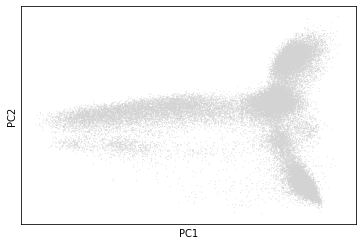

In [36]:
sc.pp.highly_variable_genes(adata_log, flavor='seurat', n_top_genes=5000)
sc.tl.pca(adata_log)
adata_log.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_log)#, save="_PCA.png" )

In [37]:
sc.pp.neighbors(adata_log, n_neighbors=30)
sc.tl.umap(adata_log)

In [38]:
import scipy as sci
adata_log.X = sci.sparse.csr_matrix(adata_log.X)
adata.X = sci.sparse.csr_matrix(adata.X)

In [40]:
adata_proc.X = sci.sparse.csr_matrix(adata_proc.X)

In [41]:
write_folder = '/storage/groups/ml01/workspace/hananeh.aliee/projects/pancreas/write/'
adata_log.write(write_folder+"adata_proc_log.h5ad")
adata_proc.write(write_folder+"adata_proc.h5ad")

... storing 'oncology' as categorical
... storing 'study' as categorical
... storing 'batch' as categorical


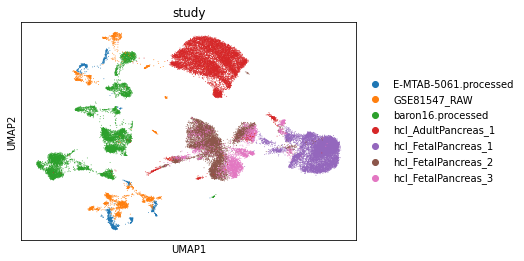

In [42]:
sc.pl.umap(adata_log, color='study')

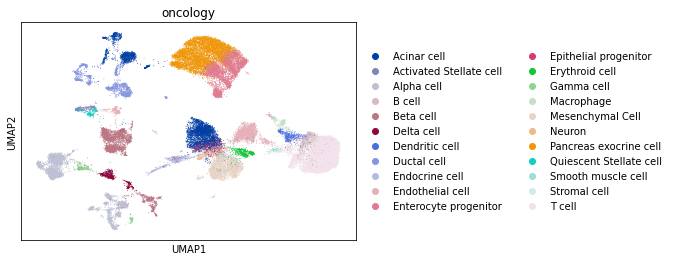

In [43]:
sc.pl.umap(adata_log, color='oncology')

In [44]:
set(adata_log.obs['study'])

{'E-MTAB-5061.processed',
 'GSE81547_RAW',
 'baron16.processed',
 'hcl_AdultPancreas_1',
 'hcl_FetalPancreas_1',
 'hcl_FetalPancreas_2',
 'hcl_FetalPancreas_3'}

In [60]:
adata_log_indrop_dropseq = adata_log[adata_log.obs['study'].isin(['E-MTAB-5061.processed','GSE81547_RAW','baron16.processed'])].copy()
adata_log_microwell = adata_log[adata_log.obs['study'].isin(['hcl_AdultPancreas_1','hcl_FetalPancreas_2','hcl_FetalPancreas_3'])].copy()

In [48]:
adata_proc_indrop_dropseq = adata_proc[adata_log.obs['study'].isin(['E-MTAB-5061.processed','GSE81547_RAW','baron16.processed'])].copy()
adata_proc_microwell = adata_proc[adata_log.obs['study'].isin(['hcl_AdultPancreas_1','hcl_FetalPancreas_2','hcl_FetalPancreas_3'])].copy()

In [49]:
adata_proc_indrop_dropseq.write(write_folder+"adata_proc_indrop_dropseq.h5ad")
adata_proc_microwell.write(write_folder+"adata_proc_microwell.h5ad")

In [74]:
adata_log_microwell.write(write_folder+"adata_log_microwell.h5ad")

In [62]:
adata_log_indrop_dropseq.X = adata_log_indrop_dropseq.X.todense()
#adata_log.X = sci.sparse.csr_matrix(adata_log.X)

In [65]:
adata_log_indrop_dropseq

AnnData object with n_obs × n_vars = 10955 × 14498 
    obs: 'oncology', 'study', 'batch', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'study_colors', 'oncology_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

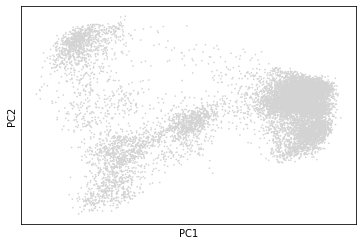

In [69]:
#sc.pp.highly_variable_genes(adata_log_indrop_dropseq, flavor='seurat', n_top_genes=4700)
sc.tl.pca(adata_log_indrop_dropseq)
adata_log_indrop_dropseq.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_log_indrop_dropseq)#, save="_PCA.png" )
sc.pp.neighbors(adata_log_indrop_dropseq, n_neighbors=30)
sc.tl.umap(adata_log_indrop_dropseq)

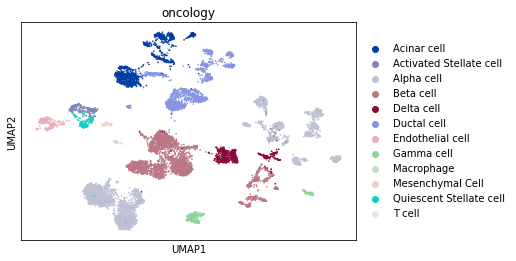

In [70]:
sc.pl.umap(adata_log_indrop_dropseq, color='oncology')

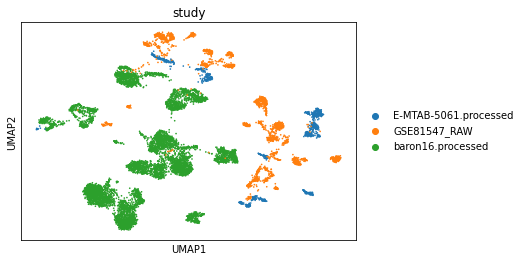

In [71]:
sc.pl.umap(adata_log_indrop_dropseq, color='study')

In [72]:
adata_log_indrop_dropseq.write(write_folder+"adata_proc_log_indrop_dropseq.h5ad")

In [2]:
write_folder = '/storage/groups/ml01/workspace/hananeh.aliee/projects/pancreas/write/'
adata_log = sc.read(write_folder+"adata_log.h5ad")
adata = sc.read(write_folder+"adata.h5ad")
adata_filter = sc.read(write_folder+"adata_filter.h5ad")

In [ ]:
adata_filter